In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/home/piai/Downloads/BOSTON_HOUSING.csv', engine = 'python')
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


### 변수 설명

* MEDV	주택가격(중앙값)
* CRIM	1인당 범죄율
* ZN	주거지 비율(25000 F^2초과)
* INDUS	비주거 상업지역 비율
* CHAS	강 조망(1-조망,0-비조망)
* NOX	산화질소 농도
* RM	가구당 평균 방 수
* AGE	자기 소유 집 비율(1940년 이전)
* DIS	중심지(직업센터) 접근 거리
* RAD	방사형 도로 접근성 지수
* TAX	재산세율($10,00당)
* PTRATIO 학생/교사 비율
* B	흑인 인구 비율
* LSTAT	저소득층 비율(%)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [25]:
#CHAS 강 조망 변수 object로 변경
df['CHAS'] = df['CHAS'].astype('object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    object 
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [27]:
df.describe()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [16]:
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

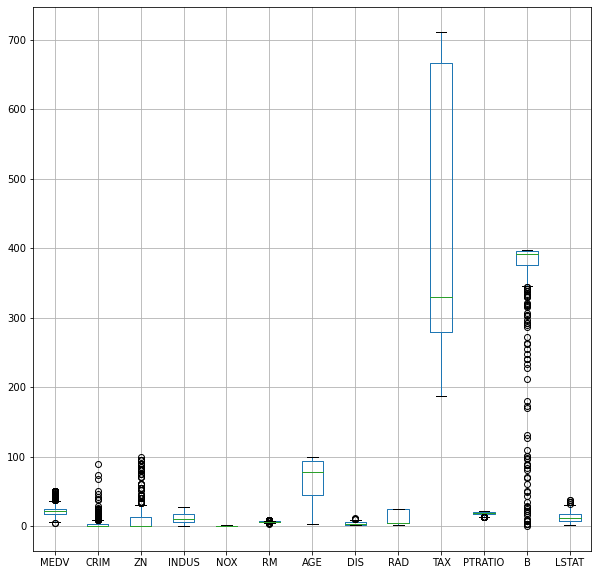

In [30]:
df.boxplot(figsize = (10,10))

In [46]:
df
df_scale = df.select_dtypes(exclude = 'object')
#scale 변환 (robust_scale, 중앙값 = 0, IQR = 1 변환)
#scale 변환: 로버스트 기준
df_scale_robust = robust_scale(df_scale)

#scale 적용하면 numpy의 ndarray 형태로 저장 - > dataframe 으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_scale.columns)
df_scale_robust.head()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.351097,-0.069593,1.44,-0.571650,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339285,0.261901,-0.637681
1,0.050157,-0.063755,0.00,-0.202943,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261901,-0.221889
2,1.692790,-0.063760,0.00,-0.202943,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066674,-0.732634
3,1.529781,-0.062347,0.00,-0.581720,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,1.880878,-0.052144,0.00,-0.581720,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261901,-0.602699


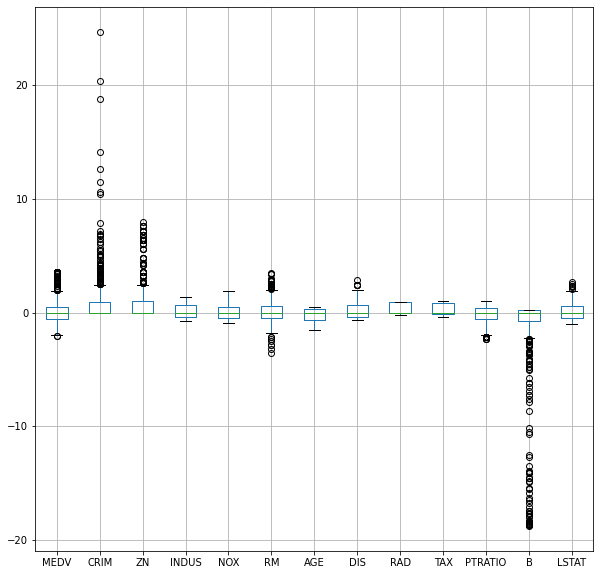

In [47]:
df_scale_robust.boxplot(figsize = (10,10))

In [48]:
#scale 변환 (minmax_scale 최소=0, 최대 =1)

#scale 변환 : 최소, 최대값 기준
df_scale_minmax = minmax_scale(df_scale)

#DataFrame 으로 변환
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_scale.columns)
df_scale_minmax.head().round(3)

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.422,0.000,0.18,0.068,0.315,0.578,0.642,0.269,0.000,0.208,0.287,1.000,0.090
1,0.369,0.000,0.00,0.242,0.173,0.548,0.783,0.349,0.043,0.105,0.553,1.000,0.204
2,0.660,0.000,0.00,0.242,0.173,0.694,0.599,0.349,0.043,0.105,0.553,0.990,0.063
3,0.631,0.000,0.00,0.063,0.150,0.659,0.442,0.449,0.087,0.067,0.649,0.994,0.033
4,0.693,0.001,0.00,0.063,0.150,0.687,0.528,0.449,0.087,0.067,0.649,1.000,0.099


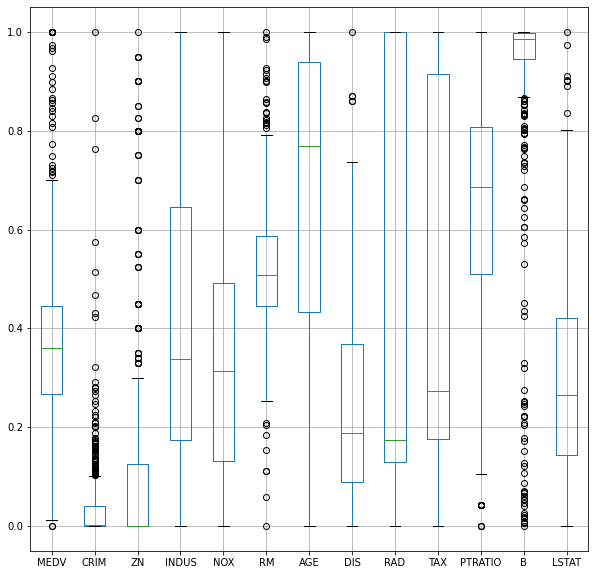

In [49]:
df_scale_minmax.boxplot(figsize = (10,10))

In [50]:
#scale 변환 : 평균 , 표준편차 기준
df_scale_std = scale(df_scale)
#scale 적용, 변환하면 numpy의 ndarray 형태로 저장 -> DataFrame 으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_scale.columns)
df_scale_std.head().round(3)

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.160,-0.420,0.285,-1.288,-0.144,0.414,-0.120,0.140,-0.983,-0.667,-1.459,0.441,-1.076
1,-0.102,-0.417,-0.488,-0.593,-0.740,0.194,0.367,0.557,-0.868,-0.987,-0.303,0.441,-0.492
2,1.324,-0.417,-0.488,-0.593,-0.740,1.283,-0.266,0.557,-0.868,-0.987,-0.303,0.396,-1.209
3,1.183,-0.417,-0.488,-1.307,-0.835,1.016,-0.810,1.078,-0.753,-1.106,0.113,0.416,-1.362
4,1.488,-0.412,-0.488,-1.307,-0.835,1.229,-0.511,1.078,-0.753,-1.106,0.113,0.441,-1.027


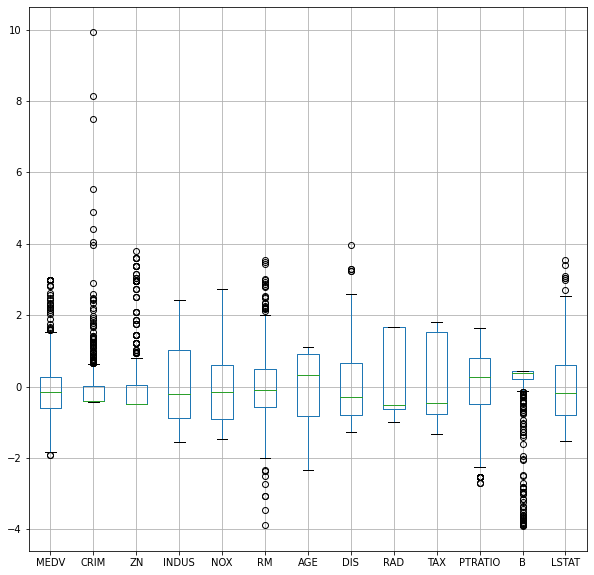

In [51]:
df_scale_std.boxplot(figsize = (10,10))